In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np 
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
iris = load_iris()
#Creamos nuestro modelo que recibe un optimizador y el numero de epocas y regresa
#la función objetivo/perdida, la norma del gradiente y el arreglo de predicciones
def logistic_regression(optimizer, epochs):
    iris = load_iris()
    X = iris.data[:, :1]
    y = iris.target

    scaler = StandardScaler()

    X = scaler.fit_transform(X)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.zeros(X.shape[1])
    m = np.zeros(X.shape[1])
    v = np.zeros(X.shape[1])
    t = 0
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    def pred(X,w):
        y_pred = sigmoid(np.dot(X, w))
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        return y_pred
    def objective(w, X, y):
        y_pred = pred(X,w)
        return -np.mean(y * np.log(y_pred + 1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
    def gradient(w, X, y):
        y_pred = sigmoid(np.dot(X, w))
        return np.dot(X.T, y_pred - y) / len(y)
    
    obj=[]
    grad_norm=[]
    if optimizer == gradient_descent:
      for epoch in range(epochs):
          grad = gradient(w, X, y)
          w = optimizer(w, grad)
          obj.append(objective(w, X, y))
          grad_norm.append(np.linalg.norm(gradient(w, X, y)))
    elif optimizer== momentum_gradient or optimizer== nesterov_gradient:
      for epoch in range(epochs):
        grad = gradient(w, X, y)
        w, v = optimizer(w, X, y, v)
        obj.append(objective(w, X, y))
        grad_norm.append(np.linalg.norm(gradient(w, X, y)))
    elif optimizer == adam_gradient:
      for epoch in range(epochs):
        t += 1
        w, m, v = optimizer(w, X, y, m, v, t)
        obj.append(objective(w, X, y))
        grad_norm.append(np.linalg.norm(gradient(w, X, y)))
    return obj, grad_norm, pred(X,w)



In [ ]:
#Implementamos los 4 métodos de optimización 
def momentum_gradient(w, X, y, v, learning_rate=0.1, momentum=0.9):
    y_pred = sigmoid(np.dot(X, w))
    grad = np.dot(X.T, (y_pred - y)) / y.size
    v = momentum * v + (1 - momentum) * grad
    w = w - learning_rate * v
    return w, v

def gradient_descent(w, grad, learning_rate=0.1):
    return w - learning_rate * grad

def nesterov_gradient(w, X, y, v, learning_rate=0.05, momentum=0.9):
    w_minus_v = w - momentum * v
    y_pred = sigmoid(np.dot(X, w_minus_v))
    grad = np.dot(X.T, (y_pred - y)) / y.size
    v = momentum * v + learning_rate * grad
    w = w - learning_rate * (momentum * v + grad)
    return w, v

def adam_gradient(w, X, y, m, v, t, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8):
    y_pred = sigmoid(np.dot(X, w))
    grad = np.dot(X.T, (y_pred - y)) / y.size
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * np.square(grad)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    w = w - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    return w, m, v
#Ejecutamos nuestro modelo para los cuatro métodos de optimización. Cada vez au
#mentando el número de epocas 
obj_nest_200, grad_norm_nest_200, pred_nest_200 = logistic_regression(nesterov_gradient, 200)
obj_nest_400, grad_norm_nest_400, pred_nest_400 = logistic_regression(nesterov_gradient, 400)
obj_nest_600, grad_norm_nest_600, pred_nest_600 = logistic_regression(nesterov_gradient, 600)


obj_grad_200, grad_norm_grad_200, pred_grad_200 = logistic_regression(gradient_descent, 200)
obj_grad_400, grad_norm_grad_400, pred_grad_400 = logistic_regression(gradient_descent, 400)
obj_grad_600, grad_norm_grad_600, pred_grad_600 = logistic_regression(gradient_descent, 600)


obj_grad_mo_200, grad_norm_grad_mo_200, pred_grad_mo_200 = logistic_regression(momentum_gradient, 200)
obj_grad_mo_400, grad_norm_grad_mo_400, pred_grad_mo_400 = logistic_regression(momentum_gradient, 400)
obj_grad_mo_600, grad_norm_grad_mo_600, pred_grad_mo_600 = logistic_regression(momentum_gradient, 600)


obj_adam_200, grad_norm_adam_200, pred_adam_200 = logistic_regression(adam_gradient, 200)
obj_adam_400, grad_norm_adam_400, pred_adam_400 = logistic_regression(adam_gradient, 400)
obj_adam_600, grad_norm_adam_600, pred_adam_600 = logistic_regression(adam_gradient, 600)


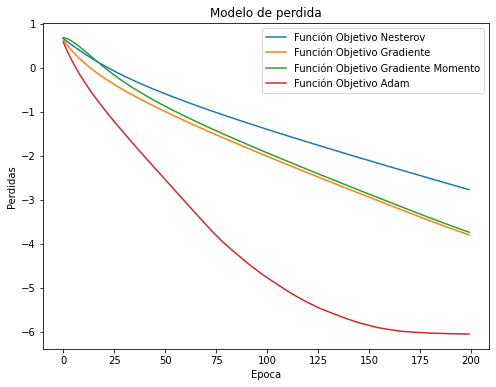

In [ ]:
#Comparamos la función de perdida de los cuatro métodos 
#con 200 epocas 
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(obj_nest_200,label='Función Objetivo Nesterov')
plt.plot(obj_grad_200,label='Función Objetivo Gradiente')
plt.plot(obj_grad_mo_200,label='Función Objetivo Gradiente Momento')
plt.plot(obj_adam_200,label='Función Objetivo Adam')
plt.title('Modelo de perdida')
plt.xlabel('Epoca')
plt.ylabel('Perdidas')
plt.legend()
plt.show()

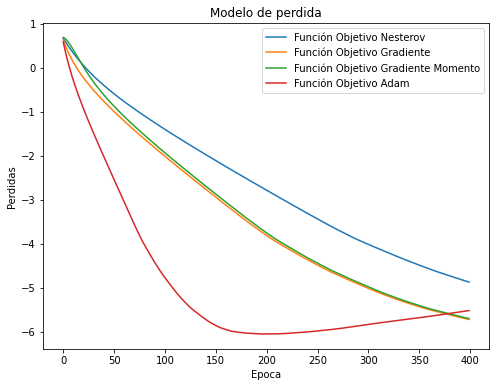

In [ ]:
#Comparamos la función de perdida de los cuatro métodos 
#con 400 epocas 
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(obj_nest_400,label='Función Objetivo Nesterov')
plt.plot(obj_grad_400,label='Función Objetivo Gradiente')
plt.plot(obj_grad_mo_400,label='Función Objetivo Gradiente Momento')
plt.plot(obj_adam_400,label='Función Objetivo Adam')
plt.title('Modelo de perdida')
plt.xlabel('Epoca')  
plt.ylabel('Perdidas')
plt.legend()
plt.show()

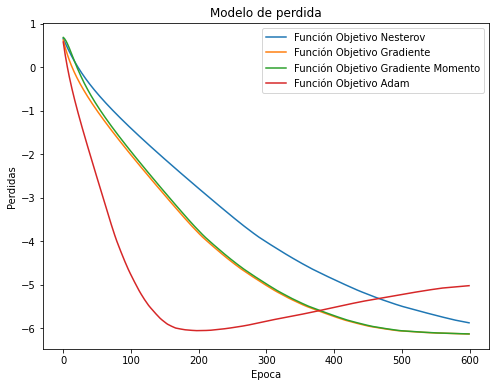

In [ ]:
#Comparamos la función de perdida de los cuatro métodos 
#con 600 epocas. 
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(obj_nest_600,label='Función Objetivo Nesterov')
plt.plot(obj_grad_600,label='Función Objetivo Gradiente')
plt.plot(obj_grad_mo_600,label='Función Objetivo Gradiente Momento')
plt.plot(obj_adam_600,label='Función Objetivo Adam')
plt.title('Modelo de perdida')
plt.xlabel('Epoca')  
plt.ylabel('Perdidas')
plt.legend()
plt.show()

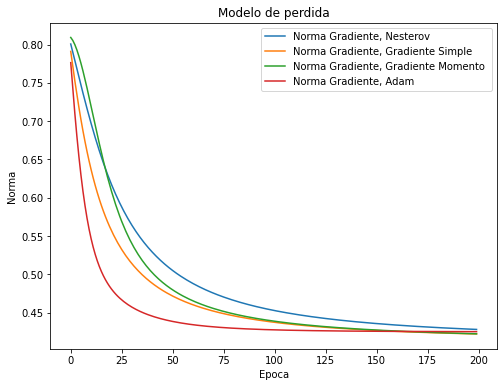

In [ ]:
#Comparamos la norma gradiente de los cuatro métodos 
#con 200 epocas 
plt.figure(figsize=(8, 6))
plt.plot(grad_norm_nest_200,label='Norma Gradiente, Nesterov')
plt.plot(grad_norm_grad_200,label='Norma Gradiente, Gradiente Simple')
plt.plot(grad_norm_grad_mo_200,label='Norma Gradiente, Gradiente Momento ')
plt.plot(grad_norm_adam_200,label='Norma Gradiente, Adam')
plt.title('Modelo de perdida')
plt.xlabel('Epoca')
plt.ylabel('Norma')
plt.legend()
plt.show()

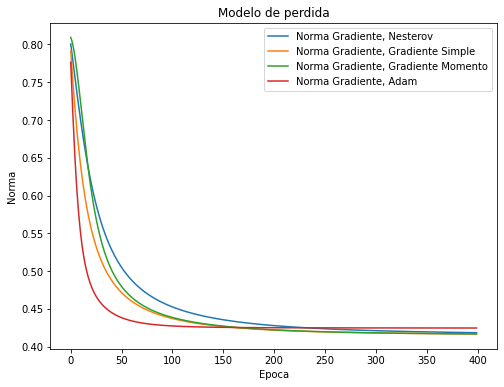

In [ ]:
#Comparamos la norma gradiente de los cuatro métodos 
#con 400 epocas 
plt.figure(figsize=(8, 6))
plt.plot(grad_norm_nest_400,label='Norma Gradiente, Nesterov')
plt.plot(grad_norm_grad_400,label='Norma Gradiente, Gradiente Simple')
plt.plot(grad_norm_grad_mo_400,label='Norma Gradiente, Gradiente Momento')
plt.plot(grad_norm_adam_400,label='Norma Gradiente, Adam')
plt.title('Modelo de perdida')
plt.xlabel('Epoca')
plt.ylabel('Norma')
plt.legend()
plt.show()

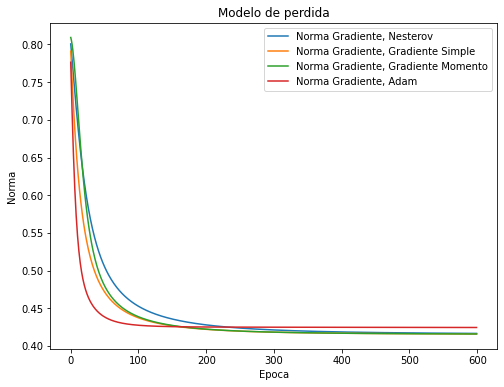

In [ ]:
#Comparamos la norma gradiente de los cuatro métodos 
#con 600 epocas 
plt.figure(figsize=(8, 6))
plt.plot(grad_norm_nest_600,label='Norma Gradiente, Nesterov')
plt.plot(grad_norm_grad_600,label='Norma Gradiente, Gradiente Simple')
plt.plot(grad_norm_grad_mo_600,label='Norma Gradiente, Gradiente Momento')
plt.plot(grad_norm_adam_600,label='Norma Gradiente, Adam')
plt.title('Modelo de perdida')
plt.xlabel('Epoca')
plt.ylabel('Norma')
plt.legend()
plt.show()

In [ ]:
pred_nest_200>0.5

array([False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
X = iris.data[:, :2]
y = iris.target
iris = load_iris()
idx  = iris.target<2      
y    = iris.target[idx]     
X    = iris.data[idx, :2]   

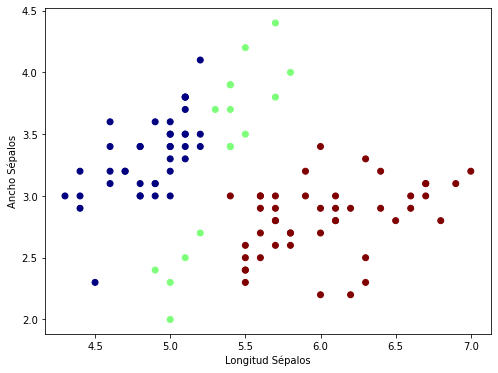

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_nest_200[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

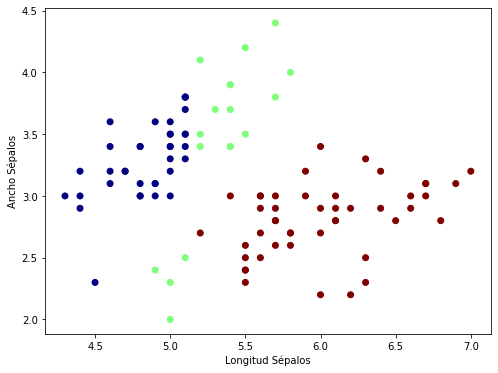

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_nest_400[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

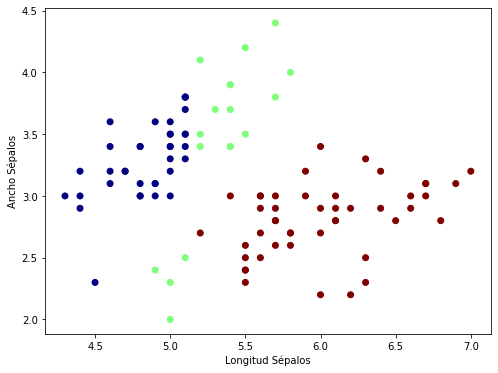

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_nest_600[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

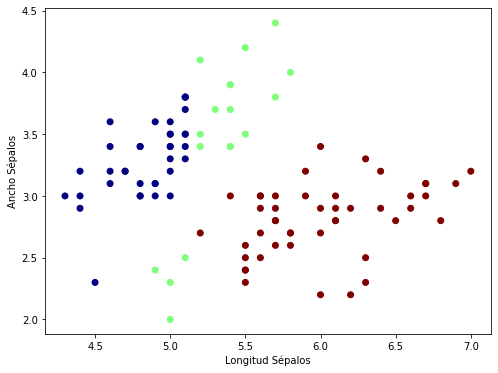

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_grad_200[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

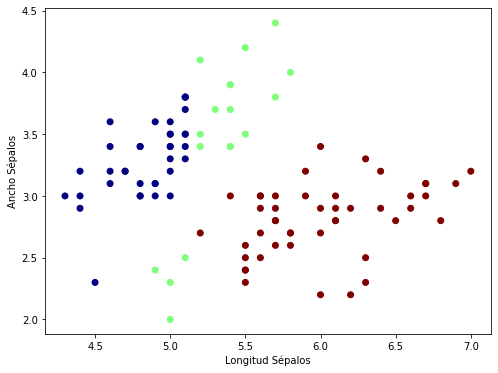

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_grad_400[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

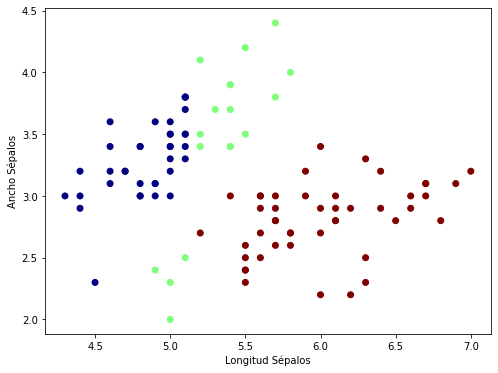

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_grad_600[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

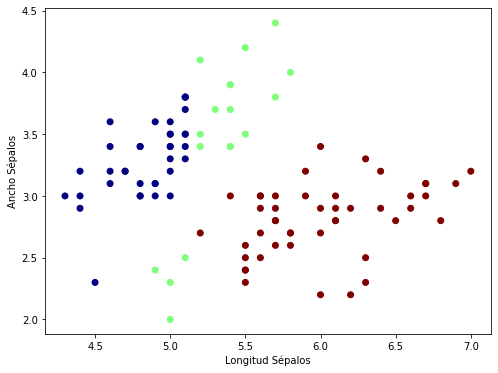

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_grad_mo_200[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

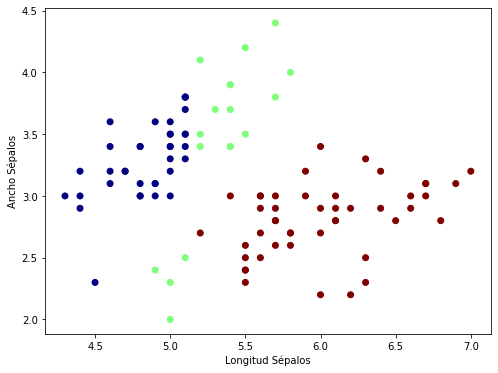

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_grad_mo_400[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

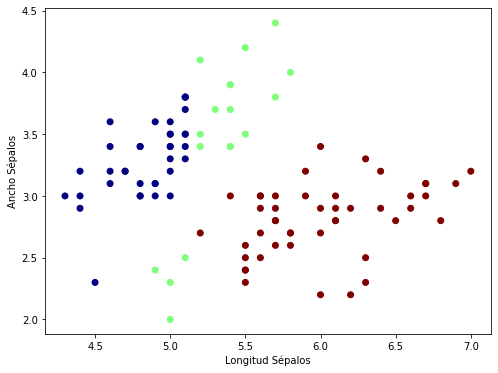

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_grad_mo_600[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

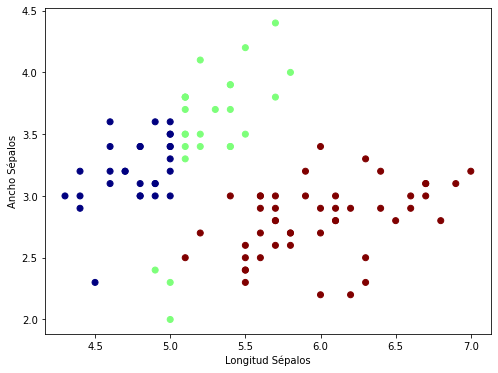

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_adam_200[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

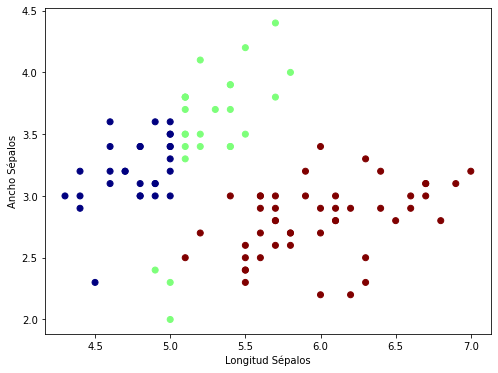

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_adam_400[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

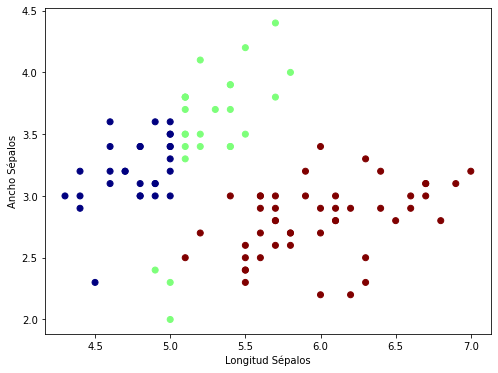

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=((pred_adam_600[:100]>0.5)+y)/2., 
            cmap=plt.cm.jet)
plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()